In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Data/processed_data.csv')
X = data.drop(columns=['price (AZN)'])
y = data['price (AZN)']

In [3]:
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('XGBRegressor', XGBRegressor(random_state=42)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('SVR', SVR(kernel='linear')),
    ('AdaBoostRegressor', AdaBoostRegressor(random_state=42))
]

accuracy_scores = []

for model in models:
    model[1].fit(X_train, y_train)
    y_pred = model[1].predict(X_test)
    accuracy_scores.append(r2_score(y_test, y_pred))
    print(f'{model[1].__class__.__name__}:')
    print(f'R2 score: {r2_score(y_test, y_pred):.4f}')
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'Root mean squared error: {rmse:.4f}\n')

LinearRegression:
R2 score: 0.7964
Root mean squared error: 61825.6130

DecisionTreeRegressor:
R2 score: 0.8183
Root mean squared error: 58403.4244

RandomForestRegressor:
R2 score: 0.8979
Root mean squared error: 43785.1363

GradientBoostingRegressor:
R2 score: 0.8292
Root mean squared error: 56630.3329

XGBRegressor:
R2 score: 0.8795
Root mean squared error: 47562.4457

KNeighborsRegressor:
R2 score: 0.7728
Root mean squared error: 65308.7660

SVR:
R2 score: 0.6304
Root mean squared error: 83297.5621

AdaBoostRegressor:
R2 score: 0.6213
Root mean squared error: 84320.4474



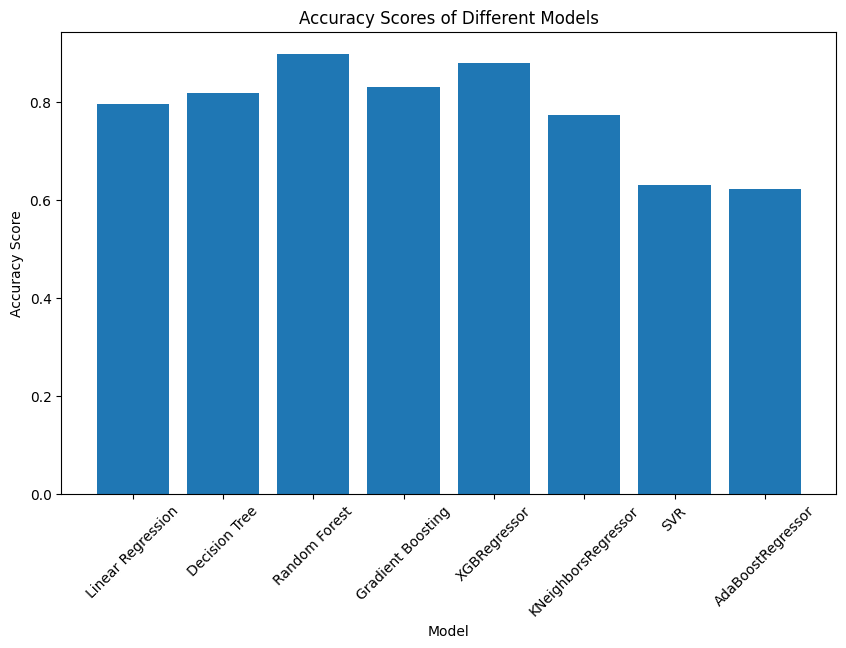

In [19]:
model_names = [x[0] for x in models]
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores)
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Models')
plt.show()

In [25]:
best_models = [model for model,score in zip(models, accuracy_scores) if score > 0.80]
best_models

[('Decision Tree', DecisionTreeRegressor(random_state=42)),
 ('Random Forest', RandomForestRegressor(random_state=42)),
 ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
 ('XGBRegressor',
  XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=42, ...))]

In [26]:
# Stacking
stacking_model = StackingRegressor(estimators=best_models, final_estimator=RandomForestRegressor
(random_state=42), cv=5)
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)
print(f'R2 score: {r2_score(y_test, y_pred_stacking):.4f}')

R2 score: 0.8938


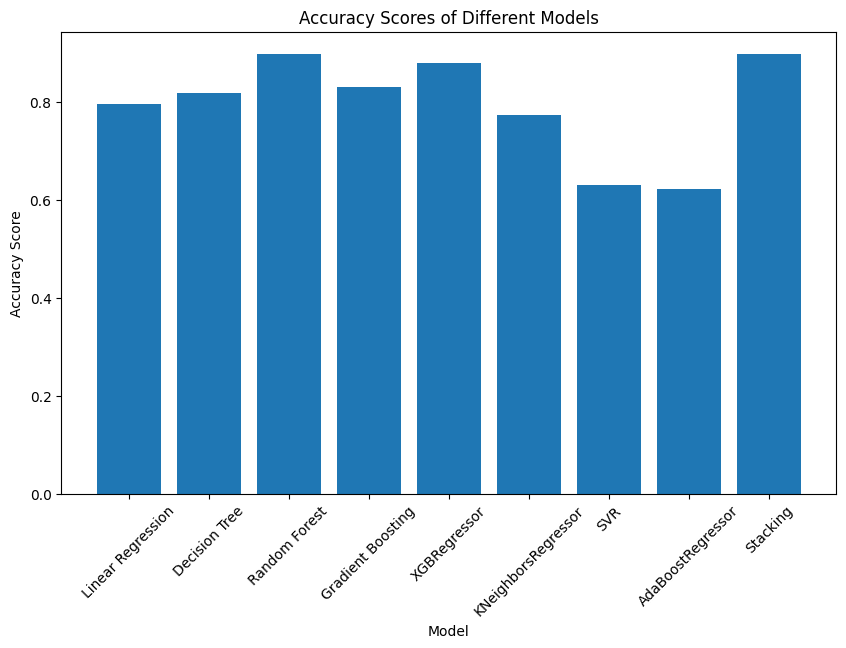

In [27]:
accuracy_scores.append(r2_score(y_test, y_pred_stacking))
model_names.append('Stacking')
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores)
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Models')
plt.show()